### 1) Explain dot product and cross product

In [88]:
from IPython.display import Latex

#### Dot product (scalar product): for any vectors a and b of the same length the dot product can be calculated as the sum of the product of their elements of same indeces:

$$ \textbf{a*b} = \sum_{i=1}^{n} \ a_ib_i = a_1b_1 + a_2b_2 \ + ... + \ a_nb_n $$

$$\mathbf {\color {red}a} \cdot \mathbf {\color {blue}b} =\sum _{i=1}^{n}{\color {red}a}_{i}{\color {blue}b}_{i}={\color {red}a}_{1}{\color {blue}b}_{1}+{\color {red}a}_{2}{\color {blue}b}_{2}+\cdots +{\color {red}a}_{n}{\color {blue}b}_{n}$$

#### The cross product can be calculated as the absolute value of the two vectors multiplied together and multiplied by the sinus of the angle between them. It is pointing to the direction of the normal vector of the plain in which the original vectors lie:

$$ \mathbf {a} \times \mathbf {b} =\left\|\mathbf {a} \right\|\left\|\mathbf {b} \right\|\sin(\theta )\ \mathbf {n} $$

#### Elementwise the coordinates can be expressed using the formula below:

$$ \begin{aligned}\mathbf {a} \times \mathbf {b} = a_{1}b_{1}\mathbf {0} +a_{1}b_{2}\mathbf {\color {green}{k}} -a_{1}b_{3}\mathbf {\color {red}{j}} -a_{2}b_{1}\mathbf {\color {green}{k}} +a_{2}b_{2}\mathbf {0} +a_{2}b_{3}\mathbf {\color {blue}{i}} +a_{3}b_{1}\mathbf {\color {red}{j}} \ -a_{3}b_{2}\mathbf {\color {blue}{i}} \ +a_{3}b_{3}\mathbf {0} = (a_{2}b_{3}-a_{3}b_{2})\mathbf {\color {blue}{i}} +(a_{3}b_{1}-a_{1}b_{3})\mathbf {\color {red}{j}} +(a_{1}b_{2}-a_{2}b_{1})\mathbf {\color {green}{k}} \\\end{aligned} $$

### 2) Calculate the angle of two vectors

#### For this we first need to define the dot product and then exploit the fact that the cosine of the angle between two vectors times their absolute value equals the dot product. To have a general function to calculate dot product we flatten column-vectors or row-vectors of two dimensional arrays

In [34]:
import numpy as np

def dot_product(u, v):
    result = 0
    try:
        if not u.shape == v.shape: # here we check if the objects we have match
            raise ValueError('Your vectors are of not the same dimensions!')
    except ValueError as ve:
        print(ve)
    else:
        try:
            if u.ndim == 2: # we have to check if they are defined as 2 dimensional arrays 
                num_rows, num_cols = u.shape
                if not (num_rows == 1 or num_cols == 1): # one of the dimensions must be one
                    raise ValueError('These are not vectors!')
        except ValueError as ve:
            print(ve)
        else:
            u_flat = u.flatten()
            v_flat = v.flatten()
            for i in range(len(u_flat)):
                result += u_flat[i]*v_flat[i]
            return result
    
def angle_between(u, v):
    try:
        if dot_product(u,u) == 0 or dot_product(v,v) == 0:
            raise ValueError('One of your vectors is a null vector!')
    except ValueError as ve:
        print(ve)
    else:
        angle = np.arccos(dot_product(u,v)/((dot_product(u,u))**(1/2) * (dot_product(v,v))**(1/2)))
        angle_degrees = angle*180/(np.pi)
        return (angle, angle_degrees)

In [35]:
s = np.array([1,0])
t = np.array([1,1])
angle_between(s, t)

(0.7853981633974484, 45.00000000000001)

#### Works with any size

In [36]:
s = np.array(np.ones(15))
t = np.array(np.arange(15))

In [37]:
angle_between(s, t)

(0.552980357273746, 31.683440625422033)

### 3) Calculate dot product between two rows of a matrix

#### We can use the already defined dot. product and pass in the rows or columns chosen

In [38]:
def row_dot(A, r1, r2):
    num_rows, num_columns = A.shape
    try:
        if num_rows < (r1+1) or num_rows < (r2+1):
            raise ValueError('Index out of range!')
    except ValueError as ve:
        print(ve)
    else:
        dot_prod = dot_product(A[r1,:], A[r2, :])
        return dot_prod
        
    

#### Works for any size

In [39]:
A = np.random.randint(20, size = (6,8))
A

array([[14,  2,  5, 19,  8,  8, 17, 15],
       [ 6, 13, 12, 18, 14,  5,  3,  5],
       [11, 18,  9, 12,  0,  3, 11, 13],
       [11,  3,  5,  8,  9,  5,  2, 18],
       [19, 11, 10,  2, 14, 12, 16,  3],
       [ 9,  3,  8,  9, 15, 18,  3,  7]])

In [40]:
row_dot(A, 0, 1)

790

#### The exception works, too

In [41]:
row_dot(A, 5, 10)


Index out of range!


### 4) Matrix division

#### Matrix division is not division in proper sense, it is rather multiplication from the right with the inverse of the matrix we are "dividing with" and is possible only for square matrices as only those have inverse matrices. Multiplication from the right with the same inverse matrix gives a different result.

#### First let's define it for the simpler case of 2x2 and 3x3 matrices. First I define a general sub_matrix() function which removes the row and column of specific indeces and returns the result. The quotient matrix will contain the quotients, although we need only a row or a column from it.

In [70]:
def sub_matrix(A, i, j):
    try:
        if A.ndim == 1:
            raise Exception('Your matrix reached minimal dimensions!')
    except Exception as e:
        print(e)
    else:
        row_del = np.delete(A, obj = i, axis = 0)
        col_del = np.delete(row_del, obj = j, axis = 1)
    return col_del
    
def quotients(A):
    try:
        if A.ndim == 1:
            raise Exception('Your matrix reached minimal dimensions!')
    except Exception as e:
        print(e)
    else:
        num_rows, num_columns = A.shape
        Q = np.zeros((num_rows, num_columns))
        for i in range(num_rows):
            for j in range (num_columns):
                if (i+j)%2 == 0:
                    Q[i, j] = A[i,j]
                else:
                    Q[i, j] = -A[i,j]
        return Q
    
def matr_det(A):
    detA = 0
    num_rows, num_columns = A.shape
    try:
        if not num_rows == num_columns and num_rows <= 3:
            raise Exception('This function calculates determinants of 2x2 and 3x3 matrices only!')
    except Exception as e:
        print(e)
    else:
        if num_rows == 2:
            detA = A[0][0]*A[1][1] - A[0][1]*A[1][0]
        else:
            for i in range(num_rows):
                detA = detA + quotients(A)[i][0]*(sub_matrix(A, i, 0)[0][0]*sub_matrix(A, i, 0)[1][1] - sub_matrix(A, i, 0)[0][1]*sub_matrix(A, i, 0)[1][0])
    return detA

# OK in the meantime I got how to generalize this for any size:
            
def matrix_det(A):
    detA = 0
    num_rows, num_columns = A.shape
    try:
        if not num_rows == num_columns:
            raise Exception('Only square matrices have determinants!')
    except Exception as e:
        print(e)
    else:
        if num_rows == 2:
            As = np.copy(A)
            detA = As[0][0]*As[1][1] - As[0][1]*As[1][0]
        else:
            for i in range(num_rows):
                As = np.copy(A)
                detA = detA + quotients(As)[i][0]*matrix_deta(sub_matrix(As, i, 0))
    return detA


#### So far this seems to work fine:

In [75]:
S = A = np.random.randint(5, size = (3,3))



In [76]:
matrix_det(S)

-12.0

In [77]:
matr_det(S)

-12.0

In [78]:
print(np.linalg.det(S))

-12.0


#### Now we need to define the inverse matrix for which we need the adjoints matrix.

In [79]:
def adjoints_matrix(A):
    num_rows, num_columns = A.shape
    C = np.zeros((num_rows, num_columns))
    try:
        if not num_rows == num_columns:
            raise Exception('Only square matrices have adjoint matrices!')
    except Exception as e:
        print(e)
    else:
        for i in range(num_rows):
            for j in range(num_columns):
                #C[i][j] = (-1)**((i+j)%2)*np.linalg.det(sub_matrix(A, i, j))
                C[i][j] = (-1)**((i+j)%2)*matrix_det(sub_matrix(A, i, j))
        A_adj = C.T
        return A_adj
            

def inverse_matrix(A):
    num_rows, num_columns = A.shape
    try:
        if not num_rows == num_columns:
            raise Exception('Only square matrices have an inverse!')
    except Exception as e:
        print(e)
    else:
        #A_inv = adjoints_matrix(A)/np.linalg.det(A)
        A_inv = adjoints_matrix(A)/matrix_det(A)
        return A_inv


#### Let's see if these work properly:

In [80]:
B = np.random.randint(20, size = (5,5))

adjoints_matrix(B)

array([[ 14863.,  -6704.,   -665., -21596.,   5936.],
       [-18790.,  11669.,   2336.,  20612.,  -6653.],
       [   629.,    317.,   2513.,   1826.,  -3500.],
       [ 19056.,  -3876., -10464., -14019.,   9564.],
       [ -3144.,  -3729.,   2859.,   4659.,    849.]])

In [81]:
inverse_matrix(B)

array([[ 0.23139196, -0.10437003, -0.01035293, -0.33621347,  0.09241356],
       [-0.29252876,  0.18166674,  0.0363676 ,  0.32089424, -0.10357604],
       [ 0.00979247,  0.00493516,  0.03912319,  0.02842776, -0.05448913],
       [ 0.29666994, -0.06034281, -0.16290692, -0.2182523 ,  0.14889543],
       [-0.0489468 , -0.05805427,  0.04450983,  0.07253281,  0.01321751]])

#### If this is correct, multiplying the original matrix and the inverse shall give the identity matrix

In [82]:
np.around(np.matmul(B, inverse_matrix(B)), decimals = 1)

array([[ 1., -0., -0.,  0., -0.],
       [ 0.,  1., -0.,  0., -0.],
       [-0., -0.,  1., -0.,  0.],
       [ 0., -0.,  0.,  1., -0.],
       [-0., -0., -0.,  0.,  1.]])

#### Finally we can define matrix division

In [83]:
def matrix_division(M1, M2):
    m1_rows, m1_cols = M1.shape
    try:
        if not M1.shape == M2.shape and m1_rows == m1_cols:
            raise Exception('Only square matrices of same dimensions can be divided!')
    except Exception as e:
        print(e)
    else:
        result = np.matmul(M1, inverse_matrix(M2))
        return result
        
    

#### If this is defined properly, dividing the matrix by itself has to give the identity matrix

In [84]:
np.around(matrix_division(B, B), decimals = 1)

array([[ 1., -0., -0.,  0., -0.],
       [ 0.,  1., -0.,  0., -0.],
       [-0., -0.,  1., -0.,  0.],
       [ 0., -0.,  0.,  1., -0.],
       [-0., -0., -0.,  0.,  1.]])

### 5) Test for orthogonality

#### First we calculate the angle between the two row vectors. We can use either the inner product of the transposed vectors or our predefined function

In [85]:
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])


In [86]:
def is_orthogonal(a,b, tol):
    try:
        if np.inner(a.T, a.T) == 0 or np.inner(b.T, b.T) == 0:
            raise ValueError('One of your vectors is a null vector!')
    except ValueError as ve:
        print(ve)
    else:
        angle = np.arccos(np.inner(a.T, b.T)/(np.inner(a.T, a.T)**(1/2) * np.inner(b.T, b.T)**(1/2)))
        if abs(angle - np.pi/2) < tol:
            return 1
        else:
            return 0
            

In [87]:
is_orthogonal(a, b, tol = 0.01)

1

#### Using our predefined function

In [23]:
def is_orthogonale(a,b, tol):
    angle, angle_degrees = angle_between(a,b)
    if abs(angle - np.pi/2) < tol:
        return 1
    else:
        return 0

In [24]:
is_orthogonale(a, b, tol = 0.01)

1

### 6)

#### Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside  (angle_between and is_orthogonal, I added dot_product as I need that for the other two). Make sure tol is defaulted but can be overwritten. 

In [37]:
class vector_calculator():
    
    def __init__(self, u, v):
        self.u = u
        self.v = v
        
    def dot_product(self):
        result = 0
        try:
            if not self.u.shape == self.v.shape:
                raise ValueError('Your vectors are of not the same dimensions!')
        except ValueError as ve:
            print(ve)
        else:
            try:
                if self.u.ndim == 2: 
                    num_rows, num_cols = self.u.shape
                    if not (num_rows == 1 or num_cols == 1):
                        raise ValueError('These are not vectors!')
            except ValueError as ve:
                print(ve)
            else:
                u_flat = self.u.flatten()
                v_flat = self.v.flatten()
                for i in range(len(u_flat)):
                    result += u_flat[i]*v_flat[i]
                return result
            
    def angle_between(self):
        try:
            if dot_product(self.u, self.u) == 0 or dot_product(self.v, self.v) == 0:
                raise ValueError('One of your vectors is a null vector!')
        except ValueError as ve:
            print(ve)
        else:
            angle = np.arccos(dot_product(self.u, self.v)/((dot_product(self.u, self.u))**(1/2) * (dot_product(self.v, self.v))**(1/2)))
            angle_degrees = angle*180/(np.pi)
            return (angle, angle_degrees)
        
    def is_orthogonal(self, tol = 0):
        angle, angle_degrees = angle_between(self.u,self.v)
        if abs(angle - np.pi/2) < tol:
            return 1
        else:
            return 0

In [38]:
new_instance = vector_calculator(a, b)

#### Checking if angle_between() is working:

In [39]:
new_instance.angle_between()

(1.5687963274615628, 89.88540847917099)

#### Checking if is_orthogonal() is working:

In [41]:
new_instance.is_orthogonal(tol = 0.001)

0

### 7) Graphical representation of the breast cancer data - PCA

#### PCA: A dataset might consist of linearly dependent or independent features. In case there is linear dependency, the complexity of the dataset can be decreased by principal component analysis (PCA), in which process we find the eigenvectors of the covariance (between the features) matrix of the dataset. We can use explaned variance ratio to get the variance explained by a particular eigenvector.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

In [4]:
breast_data.shape

(569, 30)

In [5]:
breast_labels.shape

(569,)

In [6]:
import numpy as np

In [7]:
labels = np.reshape(breast_labels, (569, 1))

In [8]:
final_breast_data = np.concatenate([breast_data, labels], axis = 1)

In [9]:
final_breast_data.shape

(569, 31)

In [10]:
import pandas as pd

In [11]:
breast_dataset = pd.DataFrame(final_breast_data)

In [12]:
breast_dataset.head(1)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0.0


In [13]:
features = breast.feature_names

In [14]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
features_labels = np.append(features, 'label')

In [30]:
breast_dataset.columns = features_labels
breast_dataset['label'].replace([0 , 1], ['Benign', 'Malignant'], inplace = True)

In [31]:
breast_dataset.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,Benign


In [32]:
from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
x.shape

(569, 30)

In [33]:
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [34]:
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x, columns = feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [36]:
from sklearn.decomposition import PCA

In [42]:
pca_breast = PCA(n_components = 6)
princ_comp_breast = pca_breast.fit_transform(x)

In [44]:
pcbreast_df = pd.DataFrame(data = princ_comp_breast, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pcbreast_df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6
564,6.439315,-3.576817,2.459487,1.177314,-0.074825,-2.375192
565,3.793382,-3.584048,2.088476,-2.506028,-0.510721,-0.246708
566,1.256179,-1.902297,0.562730,-2.089227,1.809993,-0.534446
567,10.374794,1.672010,-1.877029,-2.356031,-0.033741,0.567936
568,-5.475243,-0.670637,1.490443,-2.299157,-0.184711,1.617829


In [45]:
print(f'Explained variance per principal component: {pca_breast.explained_variance_ratio_}')

Explained variance per principal component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]


#### Let's plot the data along the first two principal components, representing benign and malignant cases with green and red colors

<Figure size 432x288 with 0 Axes>

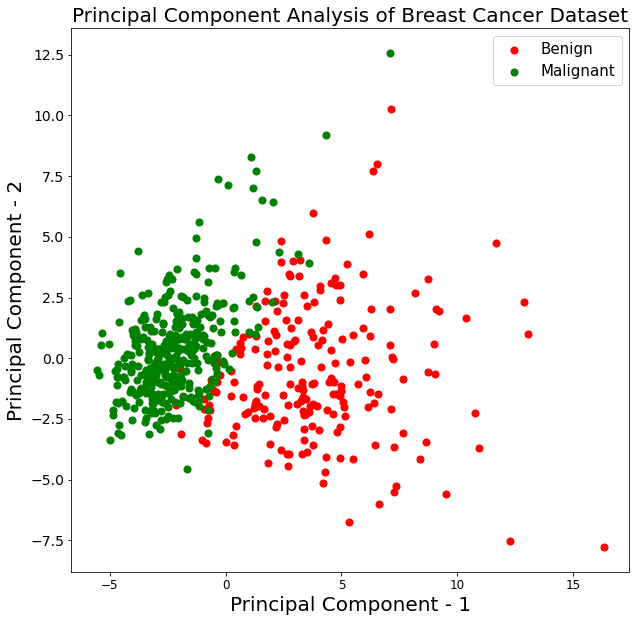

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pcbreast_df.loc[indicesToKeep, 'PC1']
               , pcbreast_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

#### When representing data this way, clustering based on malignancy is quite obvious

#### When plotting the same data along the 3rd and 4th principal components, there is still some although much less obvious clustering

<Figure size 432x288 with 0 Axes>

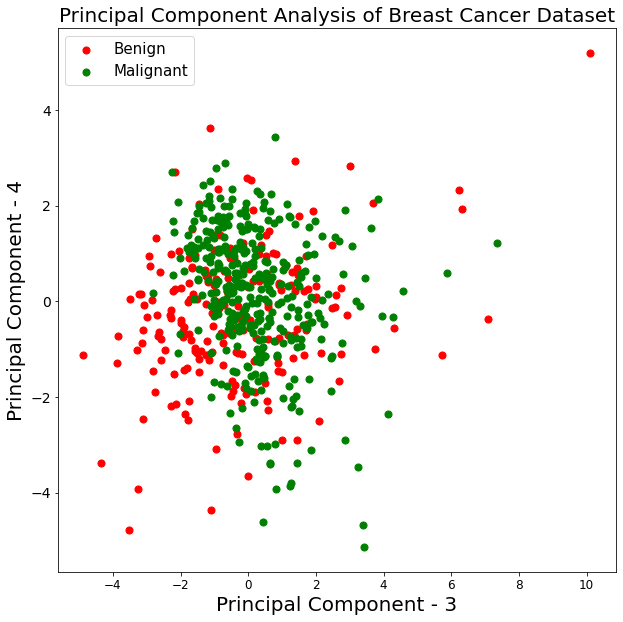

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 3',fontsize=20)
plt.ylabel('Principal Component - 4',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pcbreast_df.loc[indicesToKeep, 'PC3']
               , pcbreast_df.loc[indicesToKeep, 'PC4'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

#### Finally, along the 5th and 6th principal component it is not possible to distinguish based on malignancy any more

<Figure size 432x288 with 0 Axes>

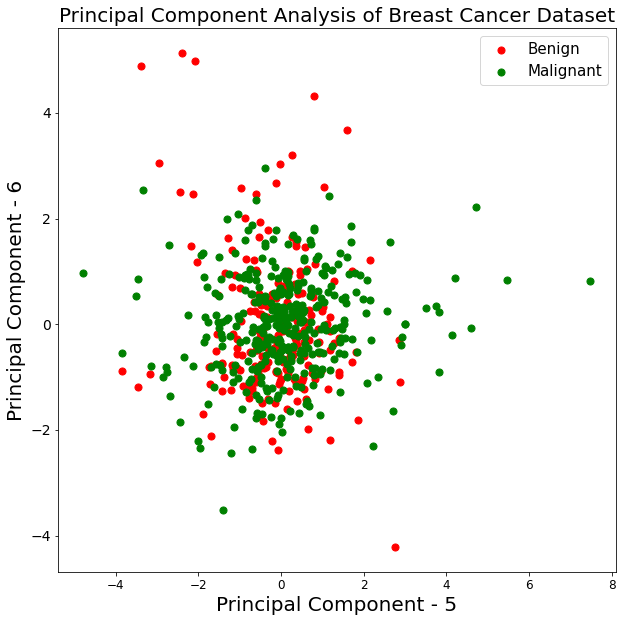

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 5',fontsize=20)
plt.ylabel('Principal Component - 6',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pcbreast_df.loc[indicesToKeep, 'PC5']
               , pcbreast_df.loc[indicesToKeep, 'PC6'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()